In [1]:
#importing libraries
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier #K-NN Classifier for comparison 2
from sklearn.ensemble import RandomForestClassifier #Random Forest Classifier for comparison 3
from sklearn.model_selection import KFold#4
from sklearn.linear_model import LinearRegression #for MLR Algo#5
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from keras.layers import  Dropout, Dense
from keras.models import Sequential
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import math
import numpy as np
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from time import perf_counter
import warnings
warnings.filterwarnings(action='ignore')
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('MCC.csv')
df.head(2)

,Cites,Authors,Title,Year,Source,Publisher,ArticleURL,CitesURL,GSRank,QueryDate,Type,Volume,Issue,StartPage,EndPage,ECC,TT on Local SMD,TT in DCOF Based Computational Offloading,TT in Traditional Computational Offloading,Difference in TT
0,3.0,"A Abunaser, S Alshattnawi",Mobile cloud computing and other mobile techno...,2012.0,Journal of Mobile Multimedia,dl.acm.org,https://dl.acm.org/citation.cfm?id=2535625,https://scholar.google.com/scholar?cites=17293...,79.0,14.6.2018,NaN,0.0,0.0,0.0,0.0,1440.0,4876.0,2559.0,24331.0,89.482553
1,1.0,"A Afianian, SS Nobakht…",Energy-efficient secure distributed storage in...,2015.0,"… (ICEE), 2015 23rd …",researchgate.net,https://www.researchgate.net/profile/Amir_Afia...,https://scholar.google.com/scholar?cites=67727...,347.0,14.6.2018,PDF,0.0,0.0,0.0,0.0,1089.0,5510.0,2902.0,28267.0,89.733612


In [5]:
df = df.drop("Authors", axis=1)
df = df.drop("Title", axis=1)
df = df.drop("Source", axis=1)
df=df.drop("Publisher",axis=1)
df = df.drop("ArticleURL", axis=1)
df = df.drop("CitesURL", axis=1)
df = df.drop("Type", axis=1)
df = df.drop("QueryDate", axis=1)
df=df.dropna(0)
df.head(10)

,Cites,Year,GSRank,Volume,Issue,StartPage,EndPage,ECC,TT on Local SMD,TT in DCOF Based Computational Offloading,TT in Traditional Computational Offloading,Difference in TT
0,3.0,2012.0,79.0,0.0,0.0,0.0,0.0,1440.0,4876.0,2559.0,24331.0,89.482553
1,1.0,2015.0,347.0,0.0,0.0,0.0,0.0,1089.0,5510.0,2902.0,28267.0,89.733612
2,3.0,2017.0,53.0,0.0,0.0,0.0,0.0,1064.0,6566.0,3132.0,31609.0,90.091430
3,11.0,2014.0,60.0,0.0,0.0,0.0,0.0,445.0,6989.0,3345.0,35115.0,90.474156
4,1.0,2017.0,68.0,0.0,0.0,0.0,0.0,412.0,7406.0,3494.0,37010.0,90.559308
5,2.0,2014.0,177.0,0.0,0.0,0.0,0.0,336.0,7450.0,3757.0,38571.0,90.259521
6,3.0,2016.0,71.0,0.0,0.0,0.0,0.0,324.0,10414.0,3888.0,42244.0,90.796326
7,1.0,2017.0,63.0,0.0,0.0,0.0,0.0,305.0,11457.0,4379.0,47714.0,90.822400
8,1.0,2016.0,149.0,0.0,0.0,0.0,0.0,255.0,11857.0,4579.0,49481.0,90.745943
9,0.0,2015.0,258.0,0.0,0.0,0.0,0.0,255.0,13221.0,4864.0,54599.0,91.091412


In [7]:
X = df.drop("ECC",axis=1)   #Feature Matrix
y = df["ECC"] 

In [8]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1238, 11), (531, 11))

In [9]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [10]:
print("Find Constent and Non-Constent Features:\n",var_thres.get_support())
print("No. of Non-Constent Features: ",len(X_train.columns[var_thres.get_support()]))

Find Constent and Non-Constent Features:
 [ True  True  True False False False False  True  True  True  True]
No. of Non-Constent Features:  7


In [11]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

for column in constant_columns:
    print(column)

4
Volume
Issue
StartPage
EndPage


In [12]:
X_train=X_train.drop(constant_columns,axis=1)
X_test=X_test.drop(constant_columns,axis=1)

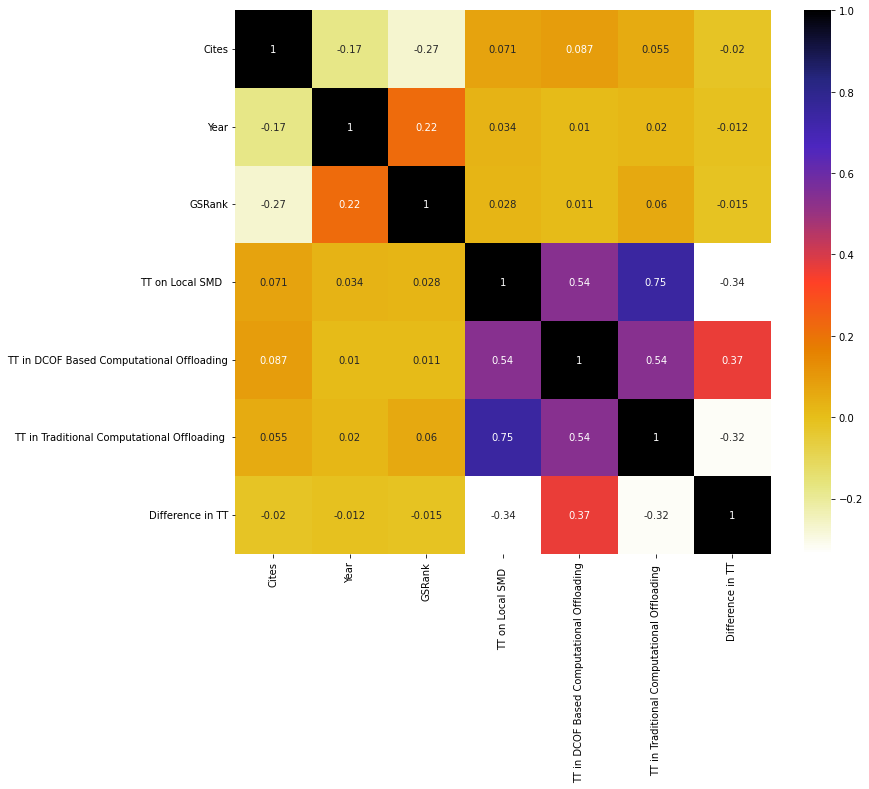

In [13]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [14]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [15]:
corr_features = correlation(X_train, 0.7)
print("No. of Correlation Features:",len(set(corr_features)))
jop=0
corr_features

No. of Correlation Features: 1


{'TT in Traditional Computational Offloading '}

In [16]:
X_train=X_train.drop(corr_features,axis=1)
X_test=X_test.drop(corr_features,axis=1)

In [17]:
X_train.head(10)

,Cites,Year,GSRank,TT on Local SMD,TT in DCOF Based Computational Offloading,Difference in TT
1790,2.0,2016.0,176.0,28000.0,1914.4,1433.400000
796,6.0,2015.0,4.0,4276.0,3889.0,78.743988
978,25.0,2012.0,27.0,51.0,68.0,99.052265
1544,1.0,2014.0,215.0,16950.0,6770.0,91.163610
1003,3.0,2014.0,143.0,22480.0,4380.0,96.540722
668,14.0,2013.0,124.0,63159.0,56467.0,69.320750
469,0.0,2017.0,143.0,13774.0,5222.0,91.142096
805,88.0,2013.0,17.0,13642.0,12177.0,74.003544
1002,0.0,2016.0,360.0,19182.0,3705.0,96.701066
160,0.0,2014.0,263.0,11457.0,4379.0,90.822400


In [18]:
from sklearn import preprocessing
from sklearn import utils

In [19]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
#mutual_info = mutual_info_classif(X_train, utils.multiclass.type_of_target(y_train.astype('int')))
mutual_info=X_train.describe()
mutual_info

,Cites,Year,GSRank,TT on Local SMD,TT in DCOF Based Computational Offloading,Difference in TT
count,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000
mean,11.152666,2014.666397,137.713247,17281.304891,11721.593624,4233.220407
std,46.216584,1.981161,96.848719,18604.916487,16328.532451,9284.839819
min,0.000000,2009.000000,1.000000,51.000000,4.600000,65.344865
25%,0.000000,2013.000000,56.000000,1767.000000,1572.400000,90.745943
50%,2.000000,2015.000000,119.500000,13221.000000,4898.000000,97.258401
75%,7.750000,2016.000000,211.000000,25687.000000,13182.000000,1601.840000
max,1218.000000,2018.000000,369.000000,99286.000000,91038.000000,43432.400000


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Activation, Dropout, LSTM, BatchNormalization, Bidirectional  #,CuDNNLSTM
from tensorflow.keras import optimizers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
y_trainp=np.asarray(y_train).astype('float32')
X_trainp=np.asarray(X_train).astype('float32')
y_testp=np.asarray(y_test).astype('float32')
X_testp=np.asarray(X_test).astype('float32')

In [21]:
#Splitting the dataset into the training set and test set
X_train2,X_test2,y_train2,y_test2=train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
#Feature Scaling the variables
sc=StandardScaler()
X_train2=sc.fit_transform(X_train2)
X_test2=sc.transform(X_test2)

In [28]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train2, y_train2)
predicted = knn.predict(X_test2)

In [29]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test2,predicted))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.00      0.00      0.00         1
         2.0       0.13      0.40      0.20        40
         3.0       0.13      0.22      0.16        32
         4.0       0.24      0.28      0.26        39
         5.0       0.05      0.04      0.05        24
         6.0       0.21      0.33      0.26        12
         7.0       0.06      0.07      0.06        15
         8.0       0.13      0.14      0.14        14
         9.0       0.00      0.00      0.00         7
        10.0       0.12      0.11      0.12         9
        11.0       0.00      0.00      0.00        10
        12.0       0.00      0.00      0.00         8
        13.0       0.00      0.00      0.00         9
        14.0       0.00      0.00      0.00         4
        15.0       0.17      0.11      0.13         9
        16.0       0.00      0.00      0.00         6
        17.0       0.00    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_cla

In [30]:
#import seaborn as sn
#import tensorflow
#cm = tensorflow.math.confusion_matrix(labels=y_test2,predictions=predicted)
#plt.figure(figsize = (10,7))
#sn.heatmap(cm, annot=True, fmt='d')
#plt.xlabel('Predicted')
#plt.ylabel('Truth')

In [31]:
print("Precision Score: {}".format(precision_score(y_test2,predicted, average = 'weighted')))
print("Recall Score: {}".format(recall_score(y_test2, predicted,average = 'weighted')))
print("Accuracy Score: {}".format(accuracy_score(y_test2,predicted)))
print("F1 Score: {}".format(f1_score(y_test2, predicted, average ='weighted')))

Precision Score: 0.07880262002278929
Recall Score: 0.12429378531073447
Accuracy Score: 0.12429378531073447
F1 Score: 0.0918837116378718


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
from sklearn.cluster import Birch

In [38]:
brc = Birch(n_clusters=7)
brc.fit(X_train2)
ClustPred=brc.predict(X_test2)

In [39]:
ClustPred

array([6, 4, 4, 4, 4, 0, 4, 5, 0, 3, 5, 6, 6, 6, 6, 4, 6, 3, 5, 3, 4, 5,
       6, 3, 6, 5, 5, 0, 4, 0, 3, 6, 6, 6, 5, 4, 4, 4, 4, 5, 4, 4, 0, 4,
       2, 4, 4, 3, 5, 4, 6, 4, 5, 6, 4, 5, 4, 4, 4, 4, 6, 0, 6, 5, 0, 4,
       4, 4, 6, 6, 0, 0, 6, 4, 2, 0, 5, 4, 4, 5, 3, 0, 5, 3, 3, 6, 5, 5,
       3, 5, 5, 4, 5, 4, 6, 0, 4, 5, 4, 4, 5, 0, 3, 3, 4, 4, 3, 4, 6, 3,
       4, 5, 4, 4, 4, 5, 5, 5, 4, 3, 5, 3, 5, 5, 4, 4, 4, 2, 0, 6, 4, 4,
       4, 6, 5, 4, 6, 4, 3, 4, 5, 4, 5, 4, 5, 4, 0, 4, 4, 4, 4, 0, 3, 5,
       4, 0, 6, 0, 5, 4, 5, 4, 5, 6, 6, 1, 4, 6, 2, 0, 4, 5, 6, 5, 6, 5,
       4, 5, 5, 6, 6, 4, 5, 3, 3, 4, 5, 4, 0, 6, 6, 4, 6, 6, 5, 5, 4, 4,
       3, 2, 6, 3, 0, 5, 4, 5, 3, 4, 6, 4, 4, 5, 5, 5, 5, 6, 6, 3, 4, 4,
       5, 6, 6, 4, 6, 5, 0, 3, 4, 0, 3, 3, 6, 6, 4, 4, 0, 0, 6, 0, 6, 5,
       5, 6, 5, 6, 5, 5, 4, 4, 6, 4, 3, 5, 5, 4, 6, 4, 4, 3, 6, 4, 3, 6,
       5, 6, 4, 3, 4, 6, 4, 6, 4, 4, 6, 5, 0, 6, 3, 6, 4, 6, 5, 0, 4, 3,
       4, 6, 5, 4, 3, 4, 6, 6, 4, 5, 0, 4, 4, 6, 6,

BIRCH without global clustering as the final step took 4.28 seconds
n_clusters : 158
BIRCH with global clustering as the final step took 4.43 seconds
n_clusters : 100


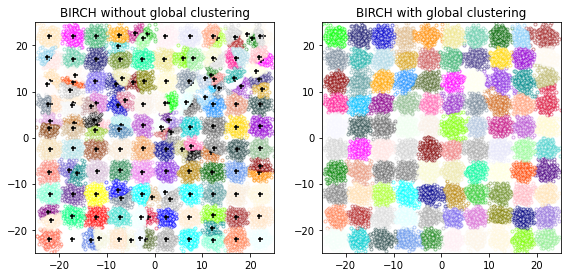

In [43]:
import time
from joblib import cpu_count
from itertools import cycle
from time import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from sklearn.cluster import Birch, MiniBatchKMeans
from sklearn.datasets import make_blobs


# Generate centers for the blobs so that it forms a 10 X 10 grid.
xx = np.linspace(-22, 22, 10)
yy = np.linspace(-22, 22, 10)
xx, yy = np.meshgrid(xx, yy)
n_centers = np.hstack((np.ravel(xx)[:, np.newaxis], np.ravel(yy)[:, np.newaxis]))

# Generate blobs to do a comparison between MiniBatchKMeans and BIRCH.
X, y = make_blobs(n_samples=25000, centers=n_centers, random_state=0)

# Use all colors that matplotlib provides by default.
colors_ = cycle(colors.cnames.keys())
fig = plt.figure(figsize=(12, 4))
fig.subplots_adjust(left=0.04, right=0.98, bottom=0.1, top=0.9)

# Compute clustering with BIRCH with and without the final clustering step
# and plot.
birch_models = [
    Birch(threshold=1.7, n_clusters=None),
    Birch(threshold=1.7, n_clusters=100),
]
final_step = ["without global clustering", "with global clustering"]

for ind, (birch_model, info) in enumerate(zip(birch_models, final_step)):
    t = time()
    birch_model.fit(X)
    time_ = time() - t
    print("BIRCH %s as the final step took %0.2f seconds" % (info, (time() - t)))

    # Plot result
    labels = birch_model.labels_
    centroids = birch_model.subcluster_centers_
    n_clusters = np.unique(labels).size
    print("n_clusters : %d" % n_clusters)

    ax = fig.add_subplot(1, 3, ind + 1)
    for this_centroid, k, col in zip(centroids, range(n_clusters), colors_):
        mask = labels == k
        ax.scatter(X[mask, 0], X[mask, 1], c="w", edgecolor=col, marker=".", alpha=0.5)
        if birch_model.n_clusters is None:
            ax.scatter(this_centroid[0], this_centroid[1], marker="+", c="k", s=25)
    ax.set_ylim([-25, 25])
    ax.set_xlim([-25, 25])
    ax.set_autoscaley_on(False)
    ax.set_title("BIRCH %s" % info)

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
lr = LinearRegression().fit(X_train, y_train)

In [49]:
lr_predictions = lr.predict(X_test)
lr_predictions[0:5]

array([31.5468595 , 27.09431087, 27.07307415, 43.34115115, 39.66312806])

In [52]:
from sklearn import metrics
from sklearn.metrics import r2_score
score1 = r2_score(y_test, lr_predictions)
print("LR R2 Sc:",score1)
print("MAE",metrics.mean_absolute_error(y_test, lr_predictions))
print("MSE:",metrics.mean_squared_error(y_test, lr_predictions))

LR R2 Sc: -0.018520474744866622
MAE 38.89050068588176
MSE: 12612.46511075113


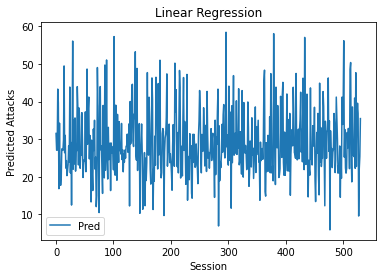

In [61]:
plt.figure(figsize=(6,4))
plt.title('Linear Regression')
plt.xlabel('Session')
plt.ylabel('Predicted Attacks')
plt.plot(lr_predictions)
plt.legend(["Pred"])
plt.show()

In [62]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [65]:
svrr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2)) 
svrr.fit(X_train, y_train) 
ssvrr=svrr.score(X_test, y_test) 
print("SVR Reg R2=",svrr.score(X_test, y_test))

SVR Reg R2= -0.05439855979980046


In [66]:
svrr_predictions=svrr.predict(X_test)
svrr_predictions

array([10.24302805, 10.00857053,  9.05170848,  9.77277677, 10.88914243,
        6.06388823,  9.16175629,  7.80048506,  9.3767512 ,  6.35493456,
        8.42780952,  9.61511683, 10.24499672,  9.84805331, 12.00065451,
        9.27539865, 10.35298115,  8.61583912,  8.1310359 ,  6.7321371 ,
        9.33490543,  7.70912211,  9.73044376, 10.16149381,  9.5309216 ,
        7.60564339,  8.34316754,  7.75411355,  8.65677188,  9.98949661,
        9.61518177,  9.0367172 , 10.52680294, 10.82679514,  7.5742332 ,
        8.9789462 ,  9.03028328,  9.73405005, 11.41095397,  7.97809577,
        8.92715007,  8.89378242,  6.70834251, 10.82481093,  8.01659743,
        8.9041754 ,  8.70232034,  6.84187982,  7.75826335, 10.29793871,
        9.51628088, 10.34483971,  7.5405547 ,  9.69261235, 11.25913805,
        9.01611629,  9.14098388,  9.45167791, 10.04848802,  9.84604492,
        8.3679624 ,  9.36493382,  9.77600671,  7.21804919,  8.92106754,
       10.25401988,  8.43454476,  9.79093029,  8.74229351,  7.97

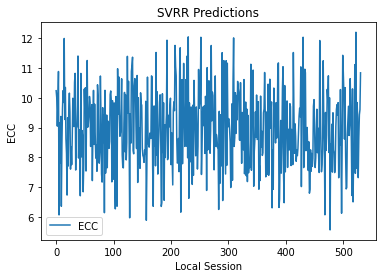

In [68]:
plt.figure(figsize=(6,4))
plt.title('SVRR Predictions')
plt.xlabel('Local Session')
plt.ylabel('ECC')
plt.plot(svrr_predictions)
plt.legend(["ECC"])
plt.show()